写这个笔记的目的很单纯：
1. 自己记录一下最近学习Pytorch的一些过程，现在事情很多很容易就忘记了。
2. 当然能够帮助到别人就更好了。我自己就是一个初学者，而且没有准备深入研究。只是作为一个了解，以便别人在谈论的时候能够知道说的是什么。

Pytorch 安装
1. 进入官网：https://pytorch.org/get-started/locally/
2. 选择需要安装的安装包：
    PyTorch Build： 选择稳定版本（1.2）
    Your OS：选择自己的操作系统
    Package：选择安装方式，这里选择pip，也可以选择conda，不过比较慢。清华的镜像没找到。。。
    Language：选择python版本
    CUDA：选择显卡版本
    会产生一个如下安装命令。
    pip3 install torch==1.2.0+cpu torchvision==0.4.0+cpu -f https://download.pytorch.org/whl/torch_stable.html
3. 运行命令，会显示下载链接。但是下载速度很慢。
4. 从命令中选择下载的文件名，在清华镜像中搜索并且下载：https://pypi.tuna.tsinghua.edu.cn/simple/
5. cd命令到下载文件夹，用pip 安装本地安装包的方法进行安装。pip install ****.whl
    一共有2个whl文件。都需要安装。
    1. torchvision****.whl
    2. torch****.whl
6. 安装成功之后就可以开始编程了。

注：这里有些值得注意的地方。
    除了pytorch之后通常还需要安装一些库。所以用清华的镜像会很省时间。https://mirrors.tuna.tsinghua.edu.cn/help/pypi/
    pip install -i https://pypi.tuna.tsinghua.edu.cn/simple some-package

另外介绍一些运行jupyter的时候常用的一些快捷键：
1. ctrl+[ 取消缩进
2. ctrl+] 缩进
3. shift+enter 运行cell
4. ctrl+/ 注释与取消注释。

运行一个简单的非线性回归

In [1]:
#导入库
import torch

In [2]:
#生成训练的数据源
x = torch.unsqueeze(torch.linspace(-1, 1, 320), dim=1)
y = 0.5*x*x + 2 + torch.mul(torch.rand(x.size()),0.05)

这里用到了
1. torch.linspace(start, end, steps=100, out=None)：
    1. 返回一个1维张量，包含在区间start 和 end 上均匀间隔的steps个点。 输出1维张量的长度为steps
2. torch.unsqueeze(input, dim, out=None)：
    1. 返回一个新的张量，对输入的制定位置插入维度 1
3. torch.mul(input, value, out=None):
    1. 用标量值value乘以输入input的每个元素，并返回一个新的结果张量。
4. torch.rand(*sizes, out=None):
    1. 返回一个张量，包含了从区间[0,1]的均匀分布中抽取的一组随机数，形状由可变参数sizes 定义。

注：在中文网站可以找到对应的函数的作用描述：https://pytorch-cn.readthedocs.io/zh/latest/package_references/torch/

In [3]:
#查看数据：
print('x.size:', x.size)
print('x_shape:', x.shape)
print('y.size:', y.size)
print('y.shape:', y.shape)
#这里有个问题，不知道什么原因：x.size 不出现

x.size: <built-in method size of Tensor object at 0x7f8b10e83ea0>
x_shape: torch.Size([320, 1])
y.size: <built-in method size of Tensor object at 0x7f8b10e83ee8>
y.shape: torch.Size([320, 1])


In [4]:
#定义训练网络，从Module继承过来。
# 至少要有两个函数。为什么有这两个函数，我也没搞懂。好像官方文件就是这么写的。
# __init__：说明了有多少层。但是层怎么连接的没有实现。
# forward：实现数据怎么传播的。
from torch import nn
class Net(nn.Module):
    def __init__(self,n_feature,n_output):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(n_feature, 10) 
        self.hidden2 = nn.Linear(10, 9) 
        self.hidden3 = nn.Linear(9, 8) 
        self.predict = nn.Linear(8, n_output) 
    def forward(self, x):
        x=self.hidden1(x) 
        x=torch.tanh(x)
        x=self.hidden2(x)
        x=torch.tanh(x) 
        x=self.hidden3(x)
        x=torch.tanh(x) 

        out = self.predict(x)
        return out



多解释一些内容：
class torch.nn.Linear(in_features, out_features, bias=True)
对输入数据做线性变换：y=Ax+b
1. 参数：
    1. in_features - 每个输入样本的大小
    2. out_features - 每个输出样本的大小
    3. bias - 若设置为False，这层不会学习偏置。默认值：True
2. 形状：
    1. 输入: (N,in_features)，表示输入多少个特征。比如10，就是一次输入10个特征，一个10维的元组。这里注意元组和列表的区别。
    2. 输出： (N,out_features)，表示输出多少个特征。
3. 变量：
    1. weight -形状为(out_features x in_features)的模块中可学习的权值
    2. bias -形状为(out_features)的模块中可学习的偏置
4. torch.tanh(x)是激活函数，具体什么是激活函数可以参考莫烦的教程。很有意思的说法就是掰弯神器。
5. 建议可以先学习用keras建立一个网络，然后再去理解这个网络就比较容易了。

In [5]:
net=Net(1,1) 
#创建一个对象，这里输入的是1维的抛物线，所以输入feature就是1，输出是和输入一一对应的，所以也是1.
print(net) 
# 直接打印网络可以看到结构是什么样子的，也可以图形化，需要继续深入研究graphviz。

Net(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=9, bias=True)
  (hidden3): Linear(in_features=9, out_features=8, bias=True)
  (predict): Linear(in_features=8, out_features=1, bias=True)
)


In [6]:
#定义优化器和损失函数。
#什么是优化器：它就是用来更新参数的。
#什么是损失函数：它定义了怎么计算计算值与目标值之间的差距。
optimizer = torch.optim.SGD(net.parameters(), lr=0.05) 
loss_func = nn.MSELoss()

In [7]:
#导入数据
predition=net(x)
#产生损失函数
loss=loss_func(predition,y) 
#根据pytorch中的backward()函数的计算，当网络参量进行反馈时，梯度是被积累的而不是被替换掉；
#但是在每一个batch时毫无疑问并不需要将两个batch的梯度混合起来累积，因此这里就需要每个batch设置一遍zero_grad 了
optimizer.zero_grad() 
#反向传播，参考这个解释：https://www.pytorchtutorial.com/pytorch-backward/
loss.backward() 
#所有的optimizer都实现了step()方法，这个方法会更新所有的参数。
#https://pytorch-cn.readthedocs.io/zh/latest/package_references/torch-optim/#_3
optimizer.step()

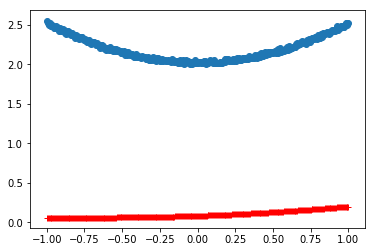

In [8]:
#显示一下一次训练的结果。
import matplotlib.pyplot as plt
%matplotlib inline 
#这里有个坑，如果没有这句话，第一次执行只显示一个标签，不知道为什么。没仔细研究。
plt.cla()
plt.scatter(x.data.numpy(),y.data.numpy(),label=loss.data)
plt.plot(x.data.numpy(),predition.data.numpy(),"r+")
# plt.text(0,0,'Loss=%4f'%loss.data)
# plt.legend(loc="best")#用于显示图例
plt.show()

In [9]:
#一次太少了，效果不好，那么多撸几轮试试看。
num_epochs = 10000

这里说一下几个概念：吃饭举例子。一天3顿，一顿吃了100口，每20口就需要再去盛一次饭。
1. epoch：一天3顿。换句话说，就是用你的数据量随机打乱之后，撸几轮。（数据源不多，可以打乱多搞几次）
2. 数据量：100口。换句话说，就是一共有多少训练数据源。
3. batch_size:20口，一个碗只能盛20口。（数据源太大一次不能完全导入内存，那么这个参数就可以限制导入内存的大小）


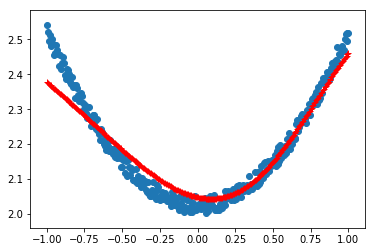

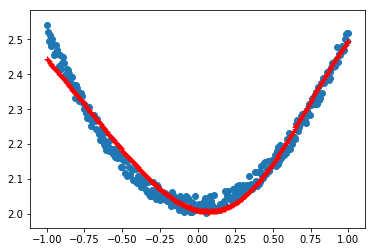

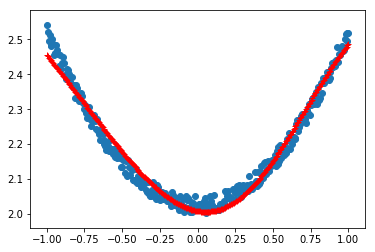

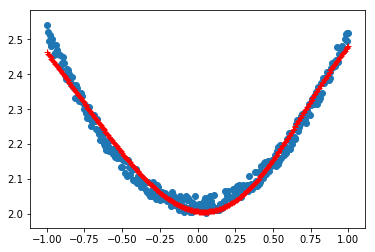

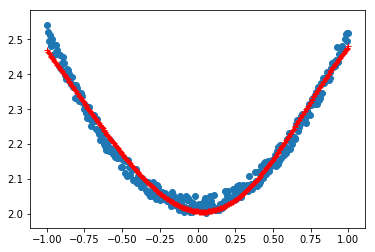

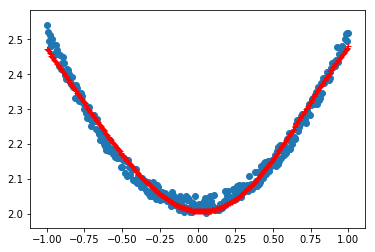

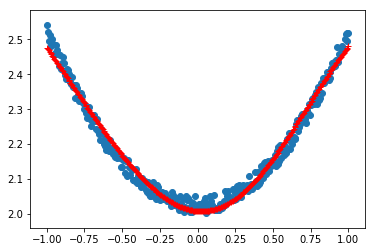

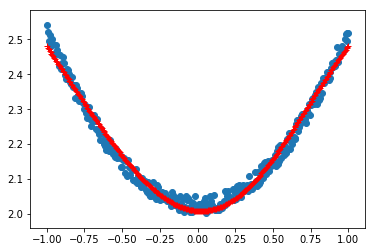

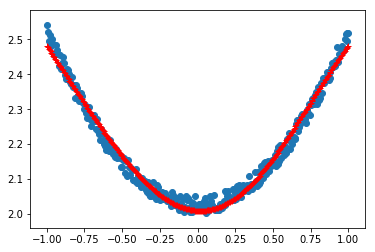

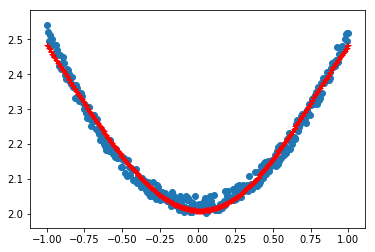

In [10]:
for epoch in range(num_epochs):
    predition=net(x)
    loss=loss_func(predition,y) 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    if (epoch+1) %1000 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy(),label=loss.data)
        plt.plot(x.data.numpy(),predition.data.numpy(),"r+")
#         plt.text(0,0,'Loss=%4f'%loss.data)
        plt.pause(0.5)

# plt.legend(loc="best")#用于显示图例
# plt.ioff()
plt.show()


这里有一个实时显示的方法plt.ion()，需要研究一下matplotlib，这样就不需要显示很多图片了。要花些时间。

x_shape: torch.Size([3200, 2])


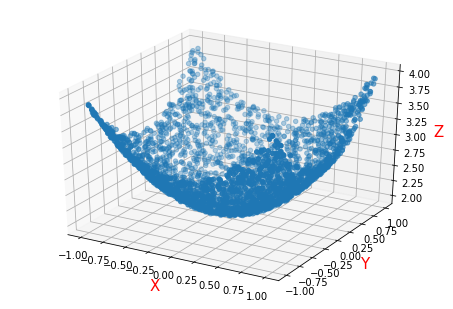

Net(
  (hidden1): Linear(in_features=2, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=9, bias=True)
  (hidden3): Linear(in_features=9, out_features=8, bias=True)
  (predict): Linear(in_features=8, out_features=1, bias=True)
)
x_t_resource: torch.Size([10000, 2])
predition_source.shape: (100, 100)


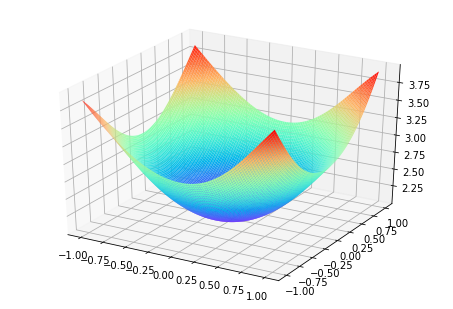

In [11]:
# Pytorch 实现

import numpy as np
import torch
from torch.autograd import Variable
from torch import nn, optim
import matplotlib.pyplot as plt
from graphviz import Graph
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib inline off

x =2*torch.rand(3200,2)-1

print('x_shape:', x.shape)


indices = torch.LongTensor([0])
x0=torch.index_select(x, 1, indices).mul(torch.index_select(x, 1, indices))
indices = torch.LongTensor([1])
x1=torch.index_select(x, 1, indices).mul(torch.index_select(x, 1, indices))

y = x0 + x1 + 2+torch.mul(torch.rand(x1.size()),0.05)
# y1 = 0.5*np.multiply(x.data.numpy()[0:,0],x.data.numpy()[0:,0]) +0.5*np.multiply(x.data.numpy()[0:,1],x.data.numpy()[0:,1]) +2 #+ np.random.normal(0, 0.05, (5, ))


fig = plt.figure()
ax = Axes3D(fig)
x_show=torch.cat((x0, x1,y), 1)
# print(show_ax.shape)
ax.scatter(x.data.numpy()[0:,0], x.data.numpy()[0:,1],y.data.numpy())
ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
plt.show()


class Net(nn.Module):
    def __init__(self,n_feature,n_output):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(n_feature, 10) 
        self.hidden2 = nn.Linear(10, 9) 
        self.hidden3 = nn.Linear(9, 8) 
        self.predict = nn.Linear(8, n_output) 
    def forward(self, x):
        x=self.hidden1(x) 
        x=torch.tanh(x)
        x=self.hidden2(x)
        x=torch.tanh(x) 
        x=self.hidden3(x)
        x=torch.tanh(x) 

        out = self.predict(x)
        return out

input_feature=2
output_feature=1
net=Net(input_feature,output_feature)
print(net) 

optimizer = torch.optim.SGD(net.parameters(), lr=0.05) 
loss_func = nn.MSELoss()


num_epochs = 10000
for epoch in range(num_epochs):
    predition=net(x)
    loss=loss_func(predition,y) #输入要是一个tensor
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 

#-----------------------------------------------------
fig = plt.figure()
ax = Axes3D(fig)
# x_t =2*torch.rand(50,2)-1
lengh=100
x_t= torch.linspace(-1, 1, lengh)
X, Y = np.meshgrid(x_t.data.numpy(), x_t.data.numpy())
x_t1=torch.from_numpy(X.reshape(lengh*lengh,1))
y_t1=torch.from_numpy(Y.reshape(lengh*lengh,1))
x_t_resource=torch.cat((x_t1, y_t1), 1)
predition_t=net(x_t_resource)
predition_source=predition_t.reshape(lengh,lengh).data.numpy()#+torch.mul(torch.rand(lengh,lengh),0.5).data.numpy()
print('x_t_resource:', x_t_resource.shape)
# print('predition_t:', predition_t.shape)
# print('X.shape:', X.shape)
# print('Y.shape:', Y.shape)
print('predition_source.shape:', predition_source.shape)

ax.plot_surface(X, Y, predition_source, rstride=1, cstride=1, cmap='rainbow')
# ax.plot_wireframe(X, Y, predition_source)
plt.show()

实现了抛物线，然后自己扩展到抛物面试试看。

再附上一个keras实现的抛物线吧，感觉keras更容易理解一些。

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                20        
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 99        
_________________________________________________________________
activation_5 (Activation)    (None, 9)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 80        
_________________________________________________________________
activation_6 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total para

W0821 20:47:52.647192 140236324116224 legend.py:1383] No handles with labels found to put in legend.


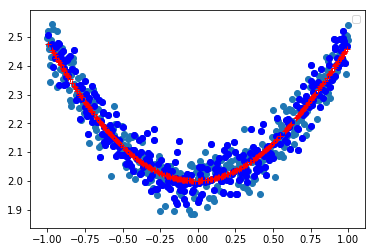

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
from keras import models 
from keras import layers 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Activation
from keras import losses
from keras.utils import plot_model
from keras import optimizers


np.random.seed(0) 
x = np.linspace(-1, 1,  640)
np.random.shuffle(x)
y = 0.5*np.square(x) +2 + np.random.normal(0, 0.05, (640, ))
plt.scatter(x, y)

model = Sequential()
model.add(Dense(input_dim = 1, units=10))
model.add(Activation('tanh'))
model.add(Dense(units=9))
model.add(Activation('tanh'))
model.add(Dense(units=8))
model.add(Activation('tanh'))
model.add(Dense(units=1))

model.summary()

sgd = optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd)


X_train, Y_train = x[:320], y[:320] 
X_test, Y_test = x[320:], y[320:] 
model.fit(X_train,Y_train,batch_size=320,epochs=10000,verbose=0)

plt.scatter(X_test, Y_test, c='b') 
X_test = np.sort(X_test)  
Y_pred = model.predict(X_test)

plt.plot(X_test, Y_pred,'r+')
plt.legend(loc="best")
plt.show()